In [1]:
#Basic imports

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import seaborn as sns

In [2]:
data = [{'Name': 'Nikhil', 'Experience': 10, 'Salary': 800000},
       {'Name': 'Nikhil', 'Experience': 14, 'Salary': 850000},
       {'Name': 'Nikhil', 'Experience': 17},
       {'Name': 'Nikhil', 'Experience': 25, 'Salary': 1100000},
       {'Name': 'Nikhil', 'Experience': 5, 'Salary': 80000},
       {'Name': 'Nikhil', 'Experience': 30},
       {'Name': 'Nikhil', 'Experience': 34, 'Salary': 1300000},
       {'Name': 'Nikhil', 'Experience': 40},
        {'Name': 'Nikhil', 'Experience': 32, 'Salary': 1300000},
       ]

df_salary = pd.DataFrame(data, columns=['Name','Experience','Salary'])

In [3]:
df_sal_copy = df_salary.copy()

In [4]:
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10,800000.0
1,Nikhil,14,850000.0
2,Nikhil,17,NaN
3,Nikhil,25,1100000.0
4,Nikhil,5,80000.0
5,Nikhil,30,NaN
6,Nikhil,34,1300000.0
7,Nikhil,40,NaN
8,Nikhil,32,1300000.0


In [5]:
# Simple Imputer is descriptive statistics filler. Strategy can be 'mean', 'median', 'mode' and 'Constant'.
# param 'missing values' defines what the value present in df which we going to fill with strategy.
# If we use strategy 'constant' we need another param called 'fill_value'

imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

In [6]:
df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,800000.0
1,Nikhil,14.0,850000.0
2,Nikhil,17.0,905000.0
3,Nikhil,25.0,1100000.0
4,Nikhil,5.0,80000.0
5,Nikhil,30.0,905000.0
6,Nikhil,34.0,1300000.0
7,Nikhil,40.0,905000.0
8,Nikhil,32.0,1300000.0


In [7]:
df_sal_copy = df_salary.copy()
imputer = SimpleImputer(missing_values= np.nan, strategy='constant', fill_value= 0)   # For STRING Column we used STRING values.
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,800000.0
1,Nikhil,14.0,850000.0
2,Nikhil,17.0,0.0
3,Nikhil,25.0,1100000.0
4,Nikhil,5.0,80000.0
5,Nikhil,30.0,0.0
6,Nikhil,34.0,1300000.0
7,Nikhil,40.0,0.0
8,Nikhil,32.0,1300000.0


In [8]:
#Each sample’s missing values are imputed using the mean value from n_neighbors nearest neighbors found in the training set.
# Two samples are close if the features that neither is missing are close.

df_sal_copy = df_salary.copy()
imputer = KNNImputer(n_neighbors=3)
X = df_sal_copy[['Salary','Experience']]
updated_X = imputer.fit_transform(X)

df_sal_copy[['Salary','Experience']] = updated_X
df_sal_copy

,Name,Experience,Salary
0,Nikhil,10.0,8.000000e+05
1,Nikhil,14.0,8.500000e+05
2,Nikhil,17.0,9.166667e+05
3,Nikhil,25.0,1.100000e+06
4,Nikhil,5.0,8.000000e+04
5,Nikhil,30.0,1.233333e+06
6,Nikhil,34.0,1.300000e+06
7,Nikhil,40.0,1.233333e+06
8,Nikhil,32.0,1.300000e+06


In [9]:
# When we know our data is sequential we can methods like bfill ,ffill , fillna

df_sal_copy = df_salary.copy()
df_sal_copy['Salary'].bfill()

0     800000.0
1     850000.0
2    1100000.0
3    1100000.0
4      80000.0
5    1300000.0
6    1300000.0
7    1300000.0
8    1300000.0
Name: Salary, dtype: float64

In [10]:
df_sal_copy['Salary'].ffill()

0     800000.0
1     850000.0
2     850000.0
3    1100000.0
4      80000.0
5      80000.0
6    1300000.0
7    1300000.0
8    1300000.0
Name: Salary, dtype: float64

In [11]:
df_sal_copy['Salary'].fillna(value= 0)

0     800000.0
1     850000.0
2          0.0
3    1100000.0
4      80000.0
5          0.0
6    1300000.0
7          0.0
8    1300000.0
Name: Salary, dtype: float64

In [12]:
df_sal_copy['Salary'].replace(np.nan, 100)

0     800000.0
1     850000.0
2        100.0
3    1100000.0
4      80000.0
5        100.0
6    1300000.0
7        100.0
8    1300000.0
Name: Salary, dtype: float64

<AxesSubplot:>

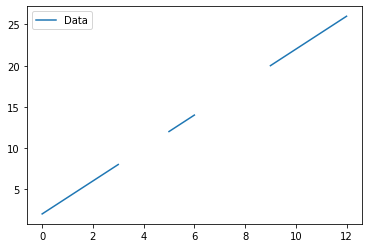

In [13]:
# Interpolate    use param 'method' we do bfill, ffill etc., from here..
# if we know our data i.e., values are in linear , quardatic, cubic , spinal etc., we give this as params in 'method'. 

new_df = pd.DataFrame([2,4,6,8,np.nan,12,14,np.nan,np.nan,20,22,24,26], columns=['Data'])
new_df.plot()

<AxesSubplot:>

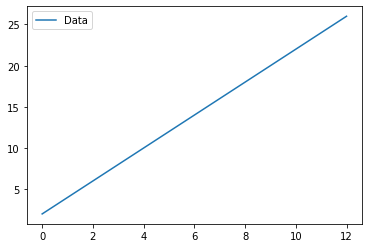

In [14]:
new_df['Data'].interpolate(method = 'linear', inplace = True)
new_df.plot()

<AxesSubplot:>

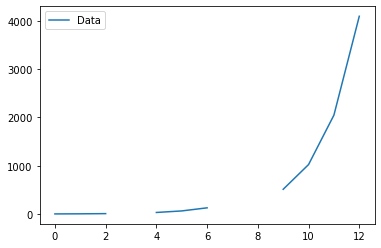

In [15]:
new_df = pd.DataFrame([2,4,8,np.nan,32,64,128,np.nan,np.nan,512,1024,2048,4096] , columns=['Data'])
new_df.plot()

<AxesSubplot:>

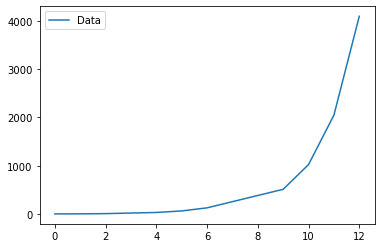

In [16]:
df_copy = new_df.copy()
df_copy['Data'] = df_copy['Data'].interpolate(method = 'linear')
df_copy.plot()

In [17]:
df_copy

,Data
0,2.0
1,4.0
2,8.0
3,20.0
4,32.0
5,64.0
6,128.0
7,256.0
8,384.0
9,512.0


<AxesSubplot:>

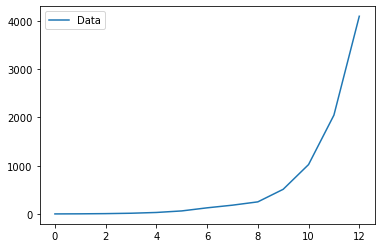

In [18]:
df_copy = new_df.copy()
df_copy['Data'] = df_copy['Data'].interpolate(method = 'quadratic', order= 2)
df_copy.plot()

In [19]:
df_copy

,Data
0,2.000000
1,4.000000
2,8.000000
3,15.933366
4,32.000000
5,64.000000
6,128.000000
7,183.114900
8,251.622819
9,512.000000
